# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 10)

In [3]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [4]:
# Your code here. 

In [5]:
student_data = pd.DataFrame(
    {'X': [17, 51, 27, 21,36,48,19,26,54,30], 
     'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
    })

Draw a dispersion diagram (scatter plot) for the data.

In [6]:
# Your code here.

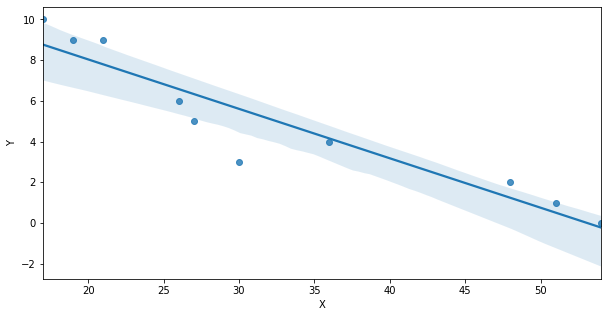

In [7]:
plt.figure(figsize = (10,5))
sns.regplot(x="X",
            y="Y",data= student_data);


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [8]:
# Your response here. 

In [9]:
"""
When analyzing the relationship between age and being late
to class when studying code, it seems to be a 
descending linear regression, meaning:
the younger the student is, the more likely it is 
for her/him to be late for class.
"""

'\nWhen analyzing the relationship between age and being late\nto class when studying code, it seems to be a \ndescending linear regression, meaning:\nthe younger the student is, the more likely it is \nfor her/him to be late for class.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
# Your response here.

In [11]:
lr = LinearRegression()

In [12]:
df= student_data

In [13]:
df.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Your response here.

In [15]:
lr.fit(
    X = df.X.to_frame(),
    y = df.Y
)

LinearRegression()

In [16]:
lr.coef_

array([-0.24282077])

In [17]:
optimal_m = lr.coef_[0]
optimal_n = lr.intercept_

In [18]:
print(optimal_m)
print(optimal_n)

-0.2428207709159809
12.888803363135771


In [19]:
tardies = -0.24282 * df.X + 12.8888

In [20]:
df

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


In [21]:
df["reg_model"] = (df.X * optimal_m + optimal_n).round(2)

In [22]:
df["reg_model_error"] = (df.reg_model - tardies).abs()

In [23]:
df.shape

(10, 4)

In [25]:
df.reg_model_error.mean()

0.0032059999999999728

In [26]:
df

,X,Y,reg_model,reg_model_error
0,17,10,8.76,0.00086
1,51,1,0.50,0.00498
2,27,5,6.33,0.00266
3,21,9,7.79,0.00042
4,36,4,4.15,0.00272
5,48,2,1.23,0.00344
6,19,9,8.28,0.00478
7,26,6,6.58,0.00452
8,54,0,-0.22,0.00348
9,30,3,5.60,0.00420


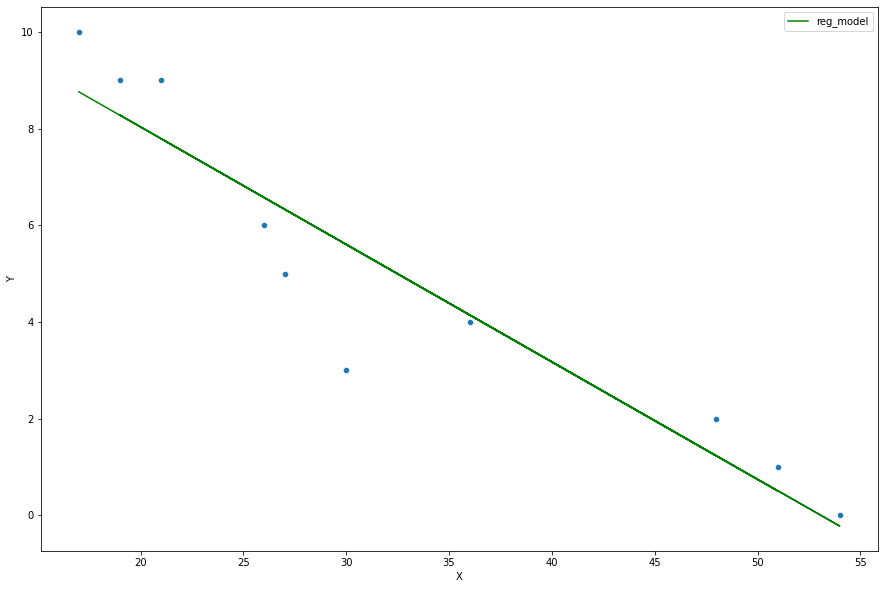

In [32]:
fig, ax = plt.subplots()
sns.scatterplot(x=df["X"], y=df["Y"])

plt.plot(df.X, df.reg_model, color='g', label='reg_model')

plt.legend()

In [26]:
# outcome variable is y, tardies.

Plot your regression model on your scatter plot.

In [ ]:
# Your code here.

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x=df["X"], y=df["y"])
plt.plot(df.X,df.y,label='regression model')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [3]:
# Import any libraries you may need & the data

In [25]:
import statsmodels.formula.api as smf
vch = pd.read_csv ('vehicles.csv')

In [26]:
vch1=vch[['CO2 Emission Grams/Mile','Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
vch1.head()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,522.764706,1984,4.0,19.388824,17,1950
1,683.615385,1984,6.0,25.354615,13,2550
2,555.437500,1985,4.0,20.600625,16,2100
3,683.615385,1985,6.0,25.354615,13,2550
4,555.437500,1987,6.0,20.600625,16,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [37]:
# Your response here.
correl = vch1.corr()
correl

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [39]:
"""
Most important variable 
is Fuel Barrels/Year
"""

'\nMost important variable \nis Fuel Barrels/Year\n'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 